1. Write a program for intensity transformation of an image using following transformations:
Image Negative and identity transformation
Log Transformation and Inverse Log Transformation
Power Law (use different values of gamma as shown in graph: refer notes)
nth root and nth power transformation
2. Implement a function to perform bit plane slicing on the 8-bit grayscale image of size M*N. 
The function should extract individual bit planes ranging from 0 to 7.
Visualize the original grayscale image along with its individual bit planes.
3. Hide the message within the least significant bit (LSB) of the pixel values in the image.
Take an image of size M*N
Take a secret message of size MN
embed the message in the last LSB of input image.
Show input and embedded image.
Extract message from embedded image.
Plot histogram of input image, embedded image and image obtained after message extraction.
4. Implement histogram equalization on the grayscale image
Display both the original grayscale image and the histogram-equalized image side by side for comparison.
Display both the histogram of original grayscale image and the histogram of equalized image side by side for comparison.

C:\Users\HP\AppData\Local\Temp\ipykernel_24956\4266063383.py:20: RuntimeWarning: overflow encountered in expm1
  inverse_log_image = np.expm1(image)
C:\Users\HP\AppData\Local\Temp\ipykernel_24956\4266063383.py:21: RuntimeWarning: invalid value encountered in cast
  inverse_log_image = np.uint8(inverse_log_image)


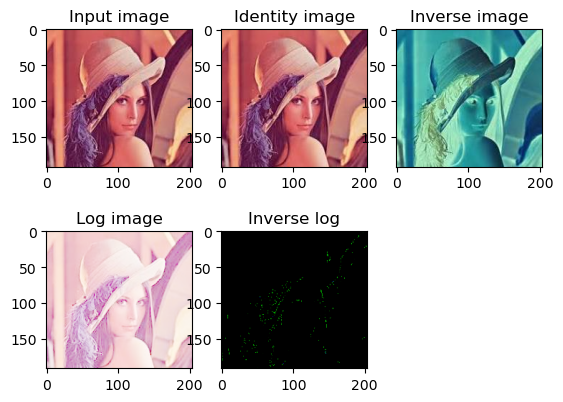

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def identity_transform(image):
    identity_image = image
    return identity_image

def inverse_transform(image):
    inverse_image = 255-image
    return inverse_image

def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c*np.log1p(image)
    log_image = np.uint8(log_image)
    return log_image

def inverse_log_transform(image):
    inverse_log_image = np.expm1(image)
    inverse_log_image = np.uint8(inverse_log_image)
    return inverse_log_image

#read image
input_image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.tiff")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
#identity transformation
identity_result = identity_transform(input_image)
#inverse transformation
inverse_result = inverse_transform(input_image)
#log transformation
log_result = log_transform(input_image)
#inverse log transformation
inverse_log_result = inverse_log_transform(input_image)

test=inverse_log_transform(inverse_log_result)

plt.figure(figure=(10,5))

plt.subplot(2,3,1)
plt.title("Input image")
plt.imshow(input_image,cmap='gray')

plt.subplot(2,3,2)
plt.title("Identity image")
plt.imshow(identity_result,cmap='gray')

plt.subplot(2,3,3)
plt.title("Inverse image")
plt.imshow(inverse_result,cmap='gray')

plt.subplot(2,3,4)
plt.title("Log image")
plt.imshow(log_result,cmap='gray')

plt.subplot(2,3,5)
plt.title("Inverse log")
plt.imshow(inverse_log_result,cmap='gray')


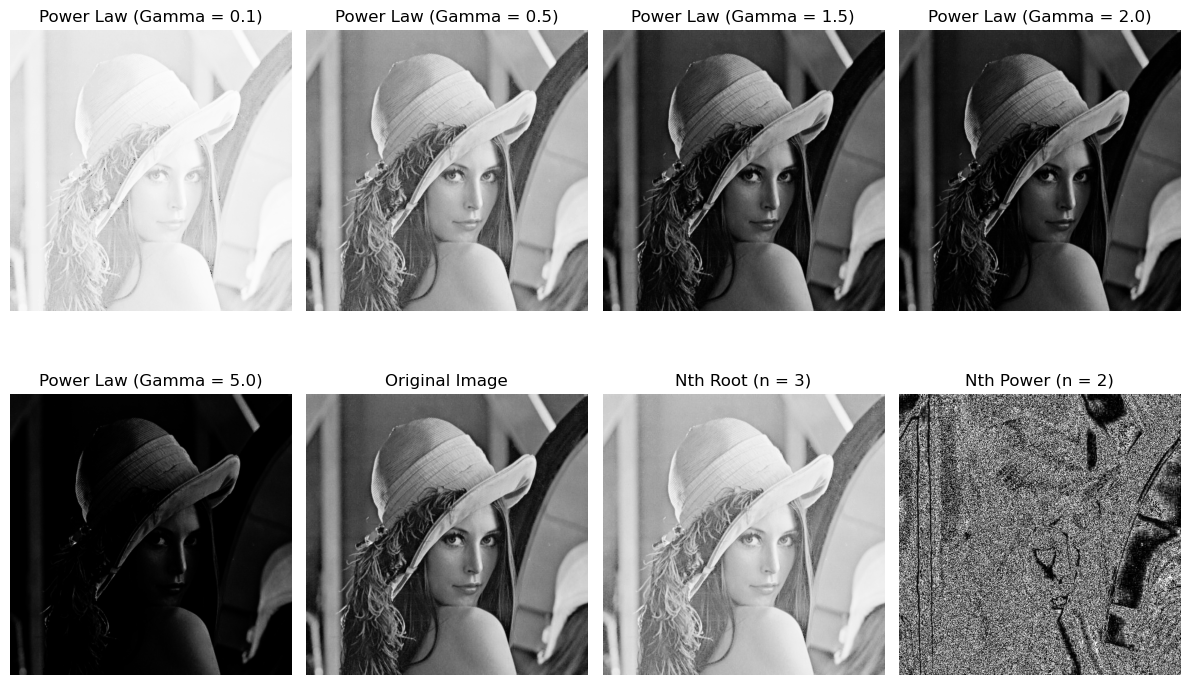

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\LennaGrayscale.jpg", cv2.IMREAD_GRAYSCALE)

# Define parameters
gamma_values = [0.1, 0.5, 1.5, 2.0, 5.0]
root_value = 3
power_value = 2

# Apply Power Law Transformation with different gamma values
power_law_transformed = []
for gamma in gamma_values:
    gamma_corrected = np.power(image / 255.0, gamma) * 255
    power_law_transformed.append(gamma_corrected)

# Apply Nth Root Transformation
root_transformed = np.power(image, 1/root_value)

# Apply Nth Power Transformation
power_transformed = np.power(image, power_value)

# Display the transformed images
plt.figure(figsize=(12, 8))

# Display Power Law Transformed Images
for i, gamma in enumerate(gamma_values):
    plt.subplot(2, 4, i + 1)
    plt.title(f"Power Law (Gamma = {gamma})")
    plt.imshow(power_law_transformed[i], cmap='gray')
    plt.axis('off')

# Display Original Image
plt.subplot(2, 4, 6)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display Nth Root Transformed Image
plt.subplot(2, 4, 7)
plt.title(f"Nth Root (n = {root_value})")
plt.imshow(root_transformed, cmap='gray')
plt.axis('off')

# Display Nth Power Transformed Image
plt.subplot(2, 4, 8)
plt.title(f"Nth Power (n = {power_value})")
plt.imshow(power_transformed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Bit-Plain slicing

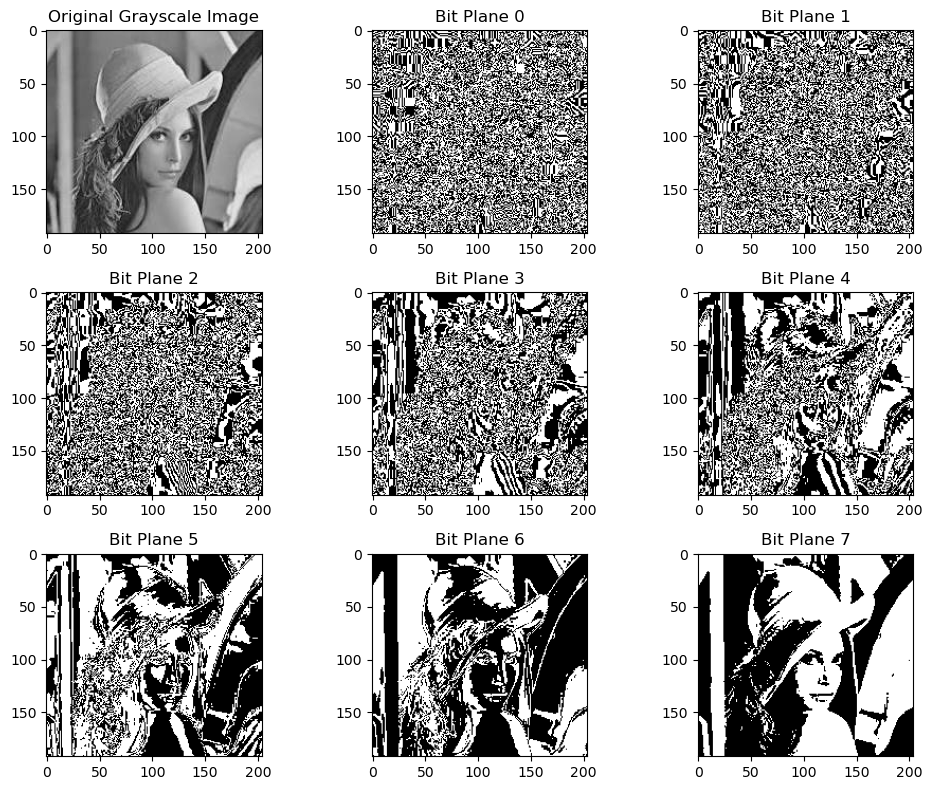

In [5]:
def bit_plane_slicing(image):
    bit_planes = []
    for i in range(8):
        bit_plane = (image >> i) & 1
        bit_planes.append(bit_plane)
    return bit_planes

# Load the grayscale image
image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.tiff", cv2.IMREAD_GRAYSCALE)

# Perform bit plane slicing
bit_planes = bit_plane_slicing(image)

# Display original grayscale image and its bit planes
plt.figure(figsize=(10, 8))
plt.subplot(3, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap='gray')

# Display Bit_Plane Images
for i in range(8):
    plt.subplot(3, 3, i + 2)
    plt.title(f"Bit Plane {i}")
    plt.imshow(bit_planes[i], cmap='gray')

plt.tight_layout()
plt.show()


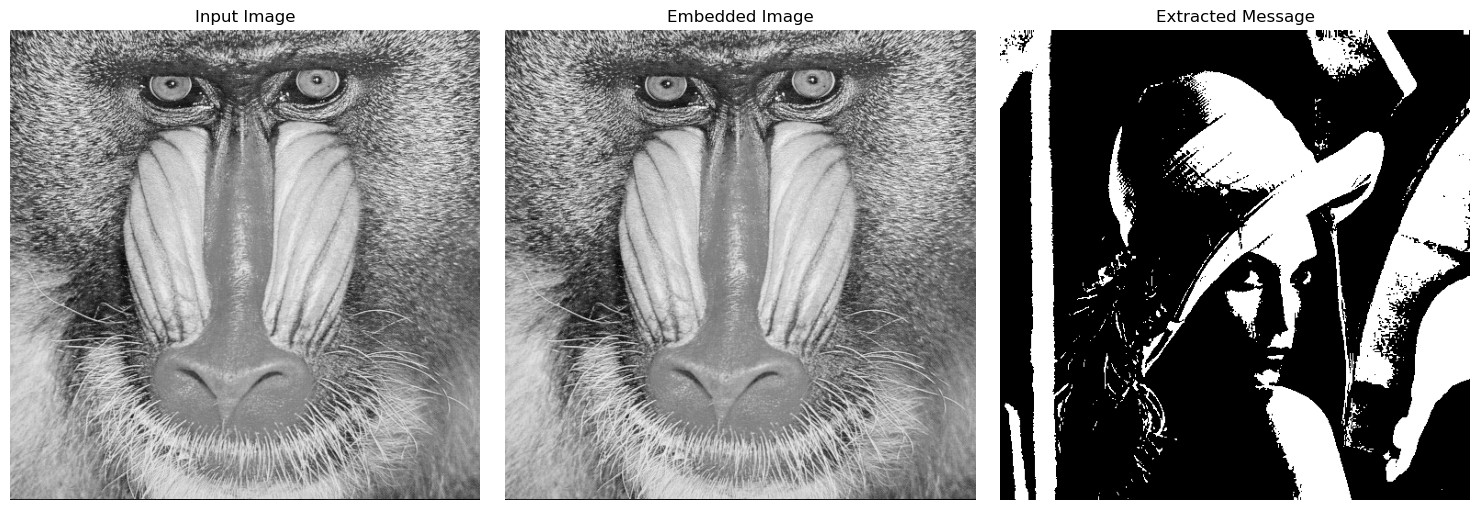

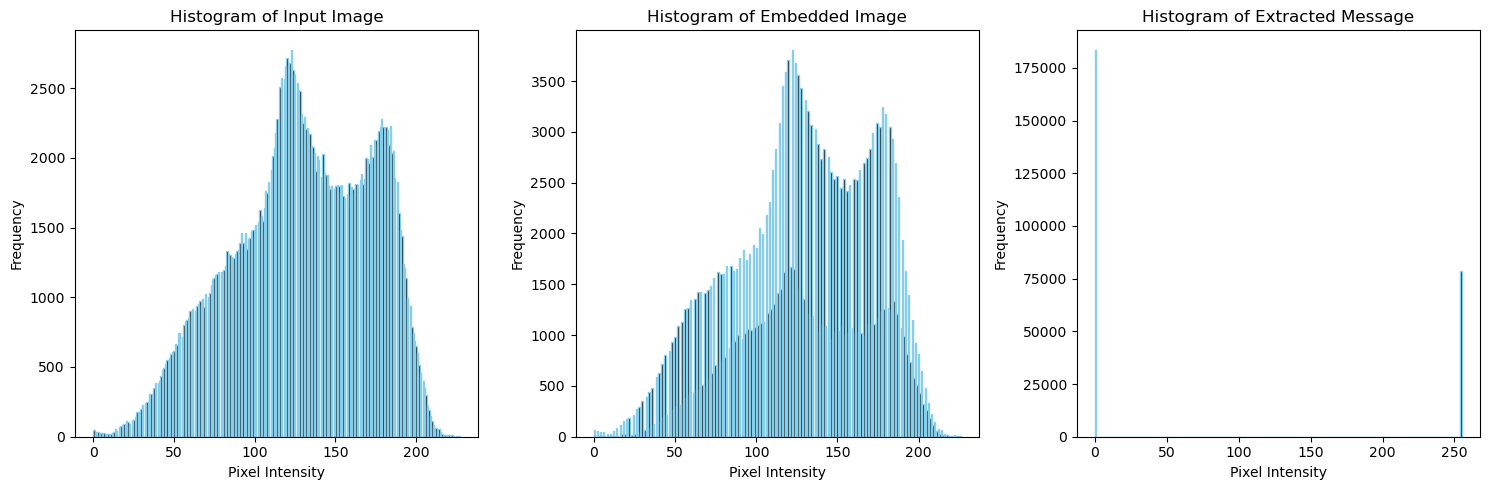

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def embed_message(image, message):
    # Ensure message is binary and flatten it
    flat_image = image.flatten()
    flat_message = message.flatten()

    # Ensure the message is not longer than the image
    assert len(flat_message) <= len(flat_image), "Message is too long to embed in the image."

    # Embed the message in the LSB of the image
    for i in range(len(flat_message)):
        flat_image[i] = (flat_image[i] & 0xFE) | flat_message[i]

    # Reshape the flat image back to the original shape
    embedded_image = flat_image.reshape(image.shape)
    return embedded_image

def extract_message(embedded_image, original_shape):
    # Flatten the embedded image
    flat_embedded_image = embedded_image.flatten()

    # Extract the LSB from each pixel
    extracted_message = flat_embedded_image & 1

    # Reshape the extracted message back to the original shape
    extracted_message = extracted_message.reshape(original_shape)
    return extracted_message

# Load the input image and secret message
input_image_path = "C:/Users/HP/Desktop/DIPLAB/Testimage/Cbaboonn.jpg"
secret_message_path = "C:/Users/HP/Desktop/DIPLAB/Testimage/LennaGrayscale.jpg"

input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
secret_message = cv2.imread(secret_message_path, cv2.IMREAD_GRAYSCALE)

if input_image is None or secret_message is None:
    raise FileNotFoundError("Input image or secret message image not found")

# Resize the secret message to fit the input image
secret_message_resized = cv2.resize(secret_message, (input_image.shape[1], input_image.shape[0]))

# Convert the secret message to binary
secret_message_binary = (secret_message_resized > 128).astype(np.uint8)

# Embed the secret message in the input image
embedded_image = embed_message(input_image, secret_message_binary)

# Extract the hidden message from the embedded image
extracted_message_binary = extract_message(embedded_image, secret_message_binary.shape)

# Convert the binary extracted message to grayscale
extracted_message = (extracted_message_binary * 255).astype(np.uint8)

# Plot input, embedded, and extracted images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Embedded Image")
plt.imshow(embedded_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Extracted Message")
plt.imshow(extracted_message, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot histograms of input, embedded, and extracted images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Histogram of Input Image")
plt.hist(input_image.flatten(), bins=256, color='black', edgecolor='skyblue')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.title("Histogram of Embedded Image")
plt.hist(embedded_image.flatten(), bins=256, color='black', edgecolor='skyblue')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.title("Histogram of Extracted Message")
plt.hist(extracted_message.flatten(), bins=256, color='black', edgecolor='skyblue')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Histogram Equilization

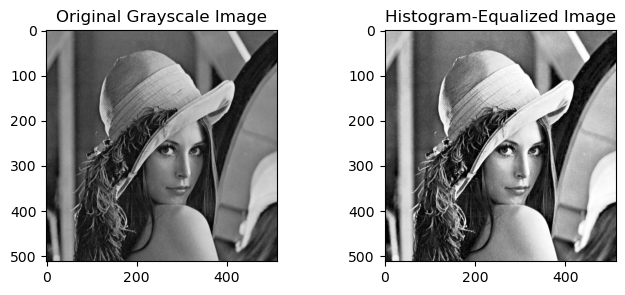

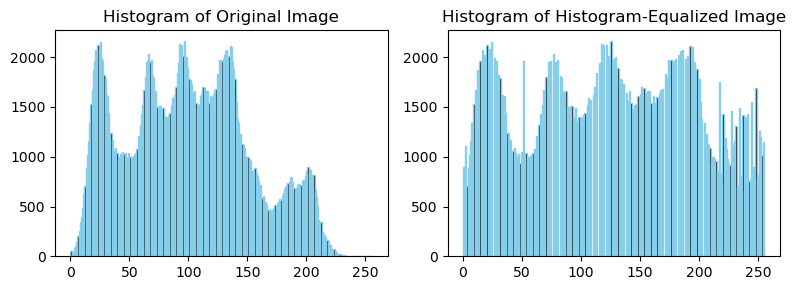

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Compute histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize CDF to range [0, 255]
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    
    # Round and cast to integer
    cdf_normalized = cdf_normalized.astype(np.uint8)
    
    # Map pixels using the normalized CDF
    equalized_image = cdf_normalized[image]
    
    return equalized_image

# Load the grayscale image
image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\LennaGrayscale.jpg", cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Plot original grayscale image and histogram-equalized image
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Histogram-Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.show()

# Plot histograms of original grayscale image and histogram-equalized image
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title("Histogram of Original Image")
plt.hist(image.flatten(), 256, [0, 256], color='black', edgecolor='skyblue')
plt.subplot(1, 2, 2)
plt.title("Histogram of Histogram-Equalized Image")
plt.hist(equalized_image.flatten(), 256, [0, 256], color='black', edgecolor='skyblue')

plt.tight_layout()
plt.show()
